## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/PhD_MasterDataset_OT_initial.csv', firstRow=18, lastRow=24)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_131222_S19-24_run1.csv',t_baseline=25)

C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (specName,massFrac) in self.massFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:97: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name,val) in self.volFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (specName,massFrac) in self.massFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:97: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name,val) in self.volFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\for

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=3)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=80s and ended at t=498s; mass=50.74379999999999g
This equals a volume of 50.845m; expected was 50.907mL; error is 0.12%


## Analyise surfactants

<IPython.core.display.Javascript object>


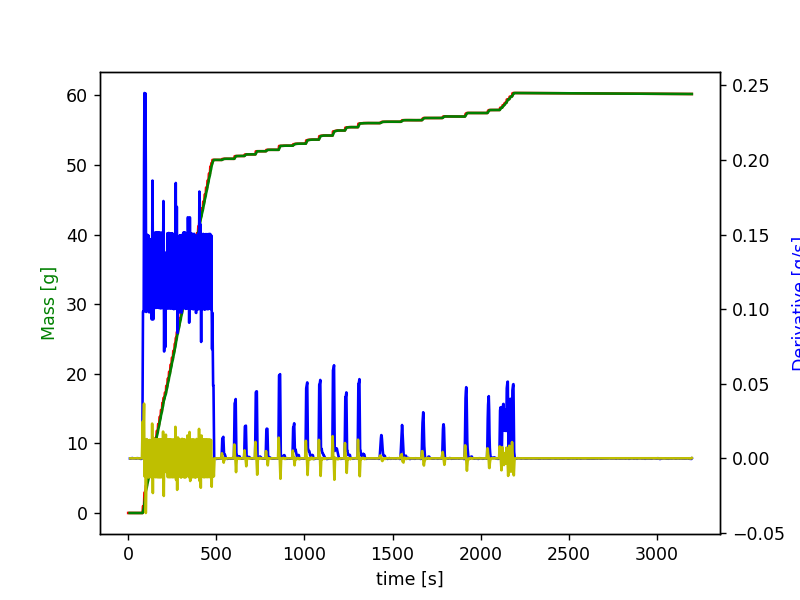

Addition of 0.165g Texapon SB 3 KC detected from 528s to 556s - expected volume = 0.223mL and actual volume = 0.147mL (resulting error is 34.0%)
Addition of 0.41g Texapon SB 3 KC detected from 598s to 636s - expected volume = 0.421mL and actual volume = 0.368mL (resulting error is 12.702%)
Addition of 0.219g Texapon SB 3 KC detected from 656s to 676s - expected volume = 0.206mL and actual volume = 0.196mL (resulting error is 4.87%)
Addition of 0.448g Texapon SB 3 KC detected from 718s to 738s - expected volume = 0.448mL and actual volume = 0.402mL (resulting error is 10.34%)
Addition of 0.206g Texapon SB 3 KC detected from 746s to 798s - expected volume = 0.188mL and actual volume = 0.185mL (resulting error is 1.714%)
Addition of 0.597g Texapon SB 3 KC detected from 850s to 894s - expected volume = 0.593mL and actual volume = 0.537mL (resulting error is 9.53%)
Addition of 0.297g Plantacare 2000 detected from 930s to 974s - expected volume = 0.283mL and actual volume = 0.27mL (resulting

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=5, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

<IPython.core.display.Javascript object>


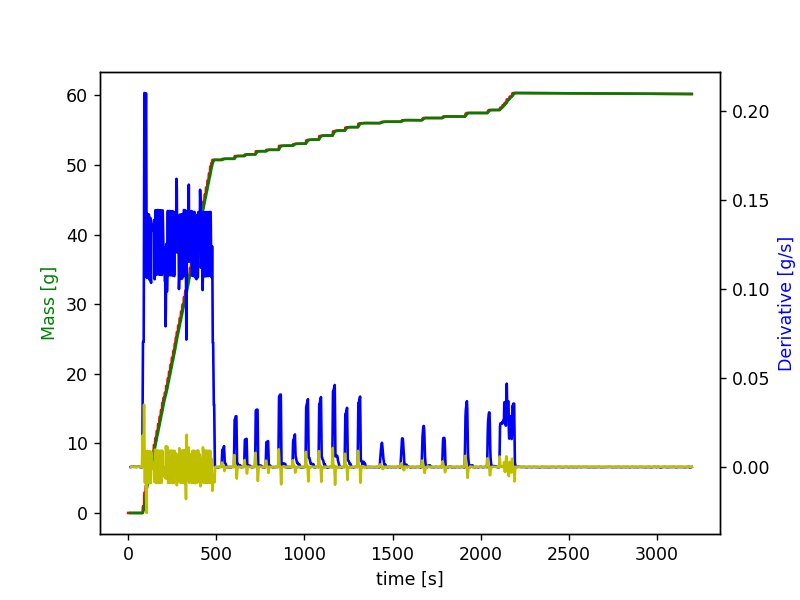

Addition of 0.198g Luviquat Excellence detected from 1346s to 1466s - expected volume = 0.198mL and actual volume = 0.178mL (resulting error is 10.032%)
Addition of 0.234g Luviquat Excellence detected from 1542s to 1586s - expected volume = 0.217mL and actual volume = 0.212mL (resulting error is 2.321%)
Addition of 0.317g Luviquat Excellence detected from 1662s to 1694s - expected volume = 0.298mL and actual volume = 0.286mL (resulting error is 3.939%)
Addition of 0.009g Luviquat Excellence detected from 1698s to 1718s - expected volume = 0.208mL and actual volume = 0.008mL (resulting error is 96.242%)
Addition of 0.223g Luviquat Excellence detected from 1778s to 1806s - expected volume = 0.469mL and actual volume = 0.202mL (resulting error is 57.033%)
Addition of 0.514g Luviquat Excellence detected from 1906s to 1946s - expected volume = 0.39mL and actual volume = 0.467mL (resulting error is 19.601%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=7, bl_mult=6, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

<IPython.core.display.Javascript object>


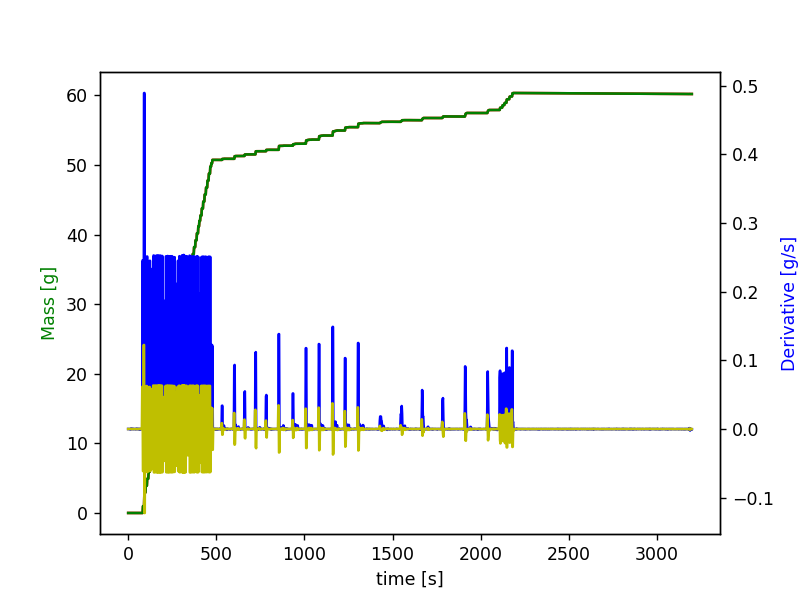

Addition of 0.425g Arlypon TT detected from 2034s to 2052s - expected volume = 0.383mL and actual volume = 0.44mL (resulting error is 14.865%)
Addition of 0.343g Arlypon TT detected from 2104s to 2118s - expected volume = 0.333mL and actual volume = 0.357mL (resulting error is 7.031%)
Addition of 0.688g Arlypon TT detected from 2118s to 2144s - expected volume = 0.291mL and actual volume = 0.715mL (resulting error is 145.714%)
Addition of 0.513g Arlypon TT detected from 2144s to 2158s - expected volume = 0.521mL and actual volume = 0.534mL (resulting error is 2.5%)
Addition of 0.398g Arlypon TT detected from 2158s to 2174s - expected volume = 0.364mL and actual volume = 0.414mL (resulting error is 13.714%)
Addition of 0.497g Arlypon TT detected from 2174s to 2190s - expected volume = 0.491mL and actual volume = 0.519mL (resulting error is 5.638%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=7, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/AnalaysedComposition_131222_S19-24.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_12140\2798024620.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
18,19.0,1.647380,0.0,0.0,0.0,2.961290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.976143,0.0,0.0,0.0,0.0,4.243251
19,20.0,4.071039,0.0,0.0,0.0,5.820306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.326025,0.0,0.0,0.0,0.0,3.398320
20,21.0,2.077545,0.0,0.0,0.0,5.583165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.009971,0.0,0.0,0.0,0.0,6.532683
21,22.0,4.518352,0.0,0.0,0.0,7.335393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087110,0.0,0.0,0.0,0.0,5.165415
22,23.0,2.085694,0.0,0.0,0.0,4.894914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.257770,0.0,0.0,0.0,0.0,4.021833
23,24.0,5.828905,0.0,0.0,0.0,5.772286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.020470,0.0,0.0,0.0,0.0,4.846846
